<a href="https://colab.research.google.com/github/Dibyanshu-gtm/Neural-Networks-and-Machine-Learning-/blob/master/MPneuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [0]:
X=breast_cancer.data
Y=breast_cancer.target

In [12]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [16]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
data['class']=breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [18]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [19]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Splitting data 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=data.drop('class',axis=1)
Y=data['class']

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

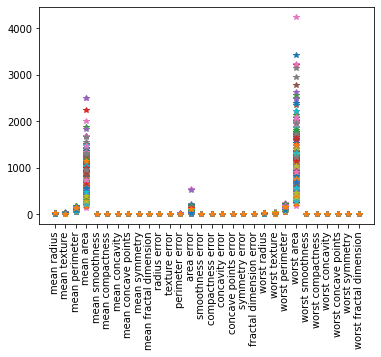

In [28]:
import matplotlib.pyplot as plt
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

#Binarization of Input 

In [0]:
X_binarized_train=X_train.apply(pd.cut,bins=2,labels=[1,0])

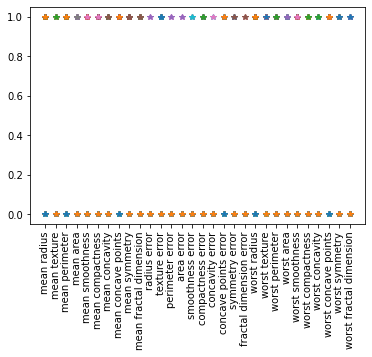

In [30]:
plt.plot(X_binarized_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarized_test=X_test.apply(pd.cut,bins=2,labels=[1,0])
#Changed Value from 0,1 in labels to 1, 0 to give more emphasis on malignant values 

In [0]:
X_binarized_test=X_binarized_test.values
X_binarized_train=X_binarized_train.values

# MP Neuron Model 

In [34]:
b=3
from random import randint
i=randint(0,X_binarized_train.shape[0])
print("For row",i)
if(np.sum(X_binarized_train[i,:])>=b):
  print("MP Neuron inference is malignant");
else:
  print("MP Neuron inference is benign");

if(Y_train[i]==1):
  print("Ground truth is mailignant")
else:
  print("Ground Truth is benign")



For row 117
MP Neuron inference is benign
Ground Truth is benign


In [37]:
b=3
Y_pred_train=[]
accurate_rows=0
for x,y in zip(X_binarized_train,Y_train):
  Y_pred=(np.sum(x)>=b)
  Y_pred_train.append(Y_pred)
  accurate_rows+=(y==Y_pred)

print(accurate_rows,accurate_rows/X_binarized_train.shape[0])

77 0.150390625


In [42]:
for b in range (X_binarized_train.shape[1]+1):
  Y_pred_train=[]
  accurate_rows=0
  for x,y in zip(X_binarized_train,Y_train):
    Y_pred=(np.sum(x)>=b)
    Y_pred_train.append(Y_pred)
    accurate_rows+=(y==Y_pred)

  print(b,accurate_rows/X_binarized_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [43]:
from sklearn.metrics import accuracy_score
Y_pred_test=[]
b=28
for x in X_binarized_test:

    Y_pred=(np.sum(x)>=b)
    Y_pred_test.append(Y_pred)
accuracy=accuracy_score(Y_pred_test,Y_test)
print(b,accuracy)

28 0.7894736842105263


# MP NEURON CLASS

In [0]:
class MPNeuron:
  def __init__(self):
    self.b=None

  def model(self,x):
    #print(self.b)
    return(sum(x)>=self.b)
  
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
  def fit(self,X,Y):
    accuracy={}
    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      accuracy[b]=accuracy_score(Y_pred,Y)

    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b
    print("Optimal Value of b is",best_b)
    print("Highest accuracy is ",accuracy[best_b])


  

In [64]:
mp_neuron=MPNeuron()
mp_neuron.fit(X_binarized_train,Y_train)

Optimal Value of b is 28
Highest accuracy is  0.849609375


In [62]:
Y_test_pred=mp_neuron.predict(X_binarized_test)
accuracy_test=accuracy_score(Y_test_pred,Y_test)
print(accuracy_test)

28


TypeError: ignored

In [57]:
mp_neuron.b

28